# Linear Regression in R
#### This is a practice of what's on https://www.youtube.com/watch?v=u1cc1r_Y7M0
#### & https://www.youtube.com/watch?v=hokALdIst8k
#### Data is from https://archive.ics.uci.edu/ml/datasets/Gas+Turbine+CO+and+NOx+Emission+Data+Set
#### & https://archive.ics.uci.edu/ml/machine-learning-databases/00551/
#### (gt_2015.csv)

In [1]:
# Read data
GTdata <- read.csv('gt_2015.csv', header=TRUE)
# Cursory check
GTdata

AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.953200,1020.1,84.985,2.5304,20.116,1048.7,544.92,116.27,10.799,7.4491,113.250
1.219100,1020.1,87.523,2.3937,18.584,1045.5,548.50,109.18,10.347,6.4684,112.020
0.949150,1022.2,78.335,2.7789,22.264,1068.8,549.95,125.88,11.256,3.6335,88.147
1.007500,1021.7,76.942,2.8170,23.358,1075.2,549.63,132.21,11.702,3.1972,87.078
1.285800,1021.6,76.732,2.8377,23.483,1076.2,549.68,133.58,11.737,2.3833,82.515
1.831900,1021.7,76.411,2.8410,23.495,1076.4,549.92,133.58,11.829,2.0812,81.193
2.074000,1022.0,75.974,2.7981,22.945,1073.7,549.98,131.53,11.687,2.2529,83.171
1.782400,1022.6,73.535,2.8327,23.337,1075.7,550.01,133.18,11.745,3.7350,85.749
1.593000,1023.2,72.873,2.8729,23.654,1078.5,550.06,135.38,11.772,3.6398,86.491


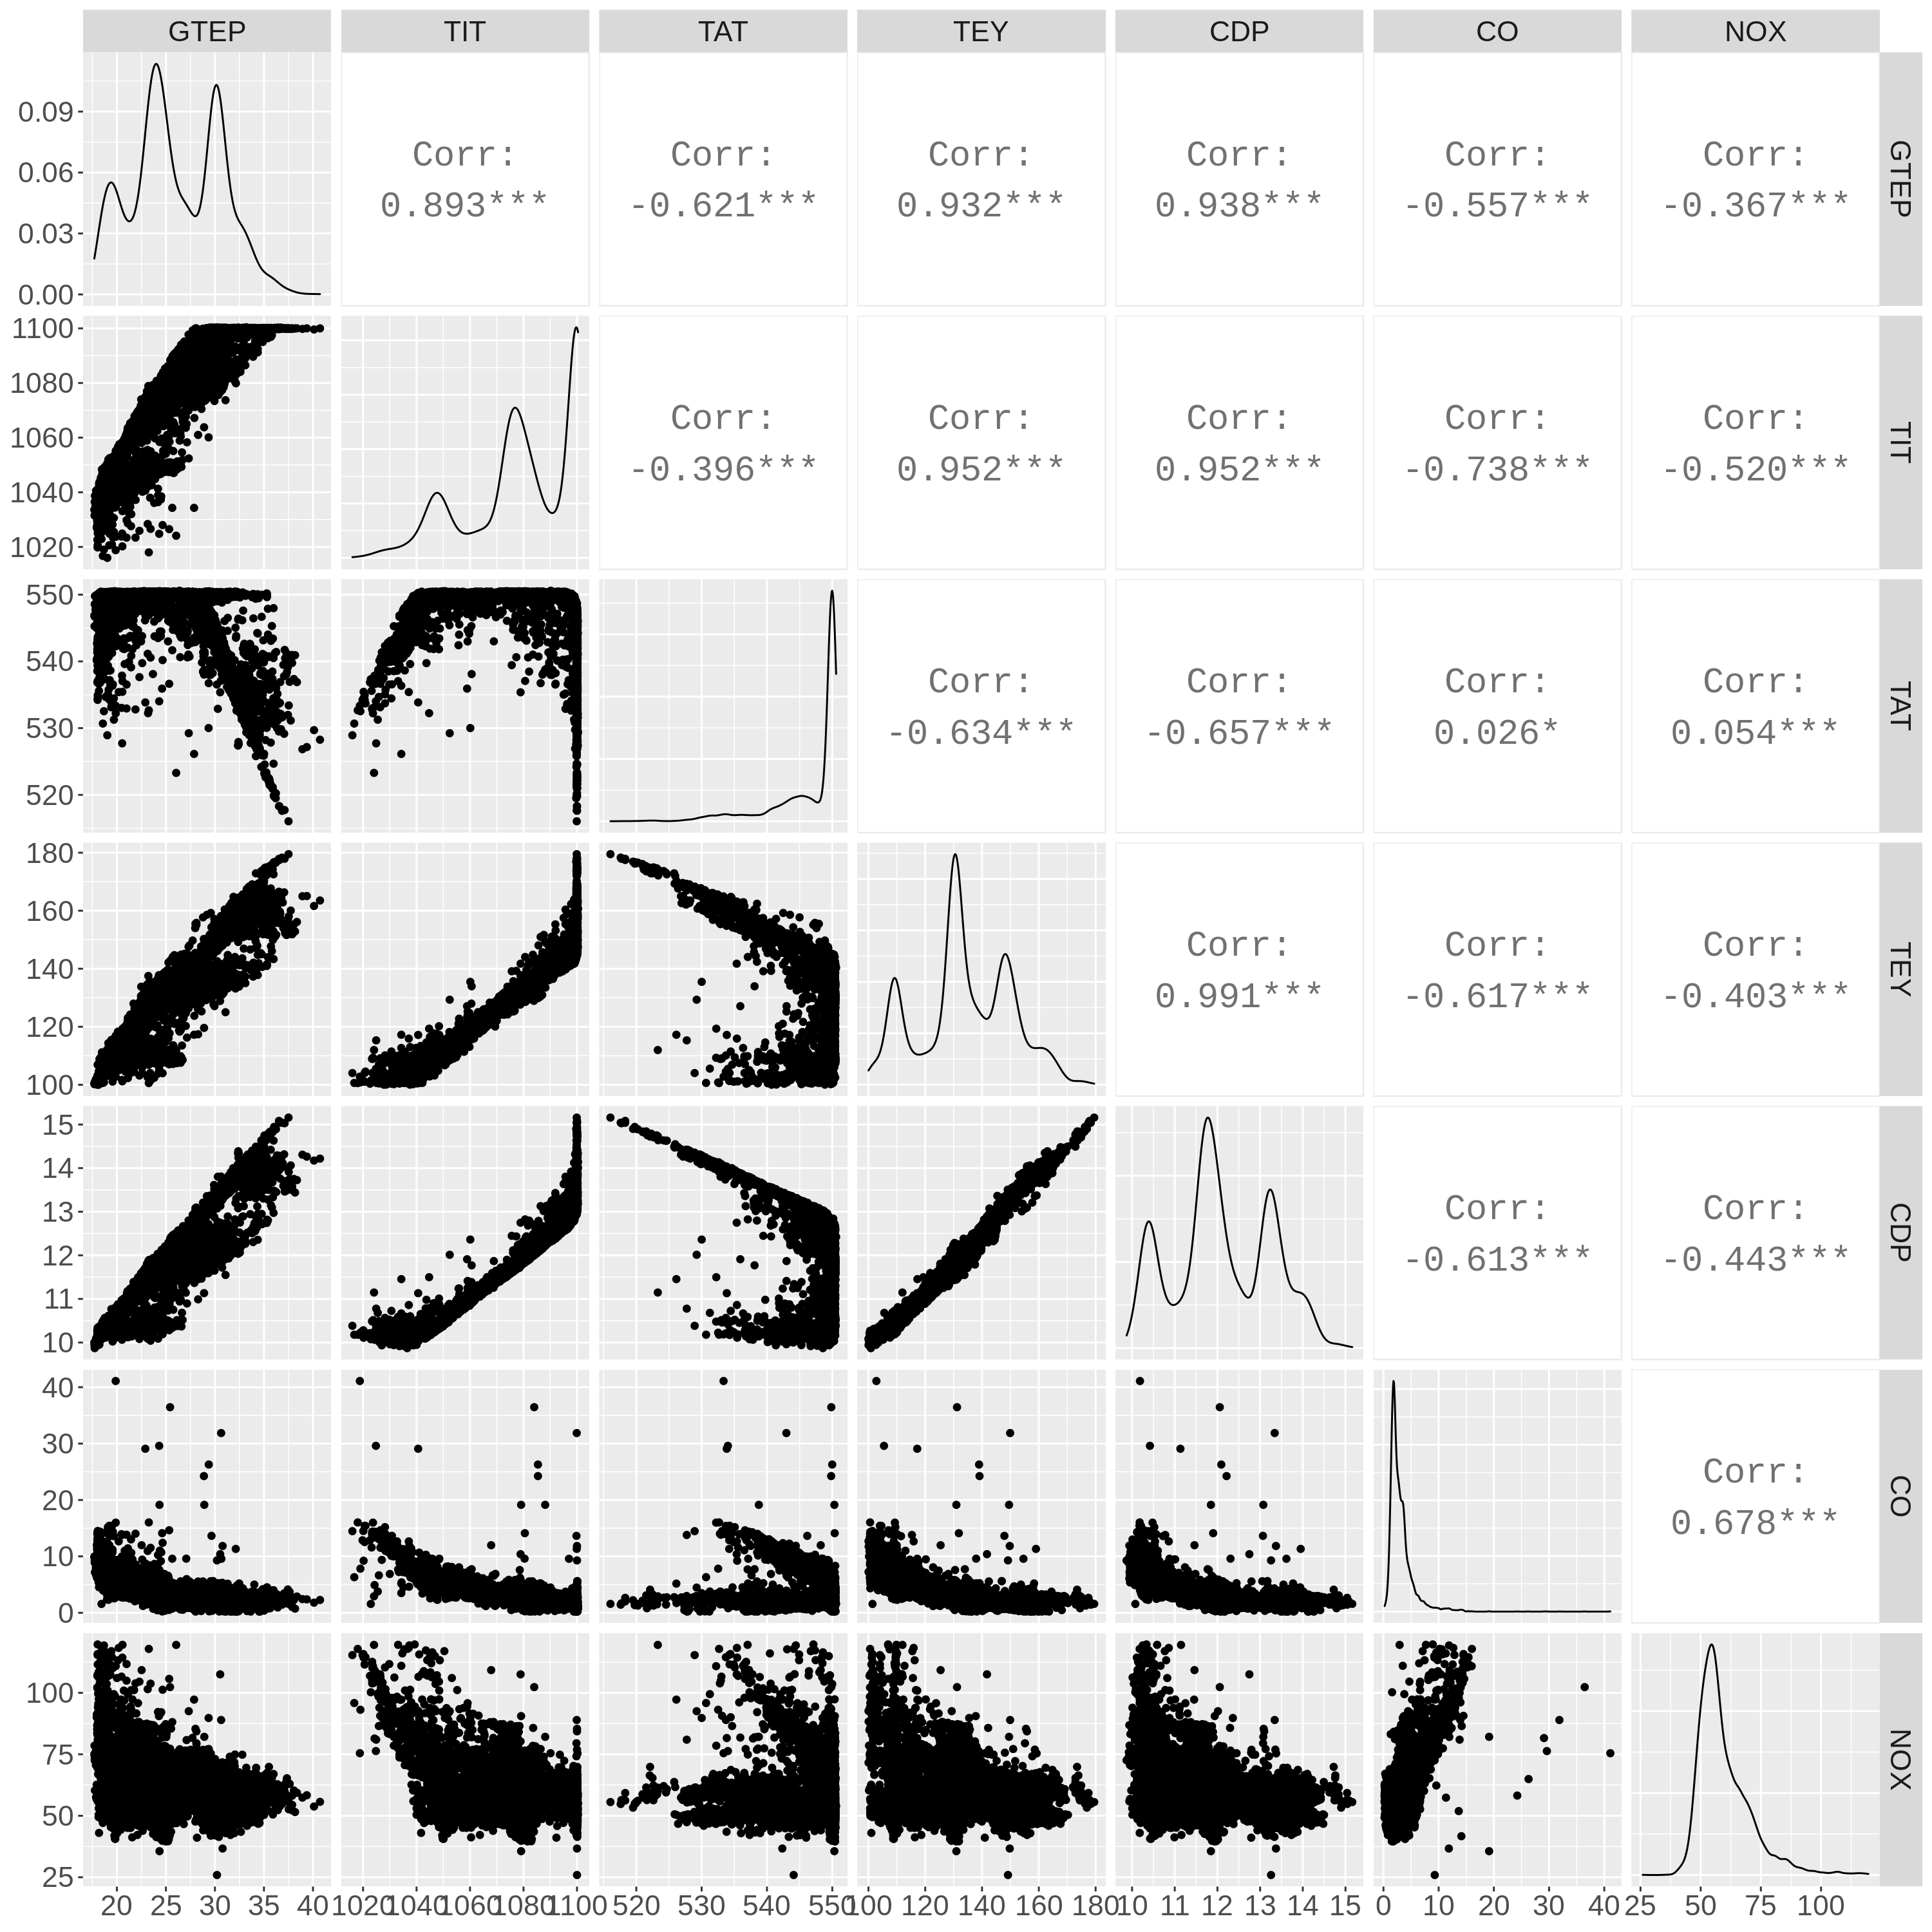

In [14]:
# Matrix plot
library(GGally)
scol = 5    # starting column number (index)
ncol = 7    # the number of columns to plot
psize   = 2.5*(ncol-1)    # 2" per column
options(repr.plot.height=psize, repr.plot.width=psize,repr.plot.res = 200)
ggpairs(GTdata[,scol:(scol+ncol-1)], diag = list(continuous = "densityDiag"), upper = list(continuous = wrap('cor', size=7))) +
                                                                                      theme(text = element_text(size = 20))

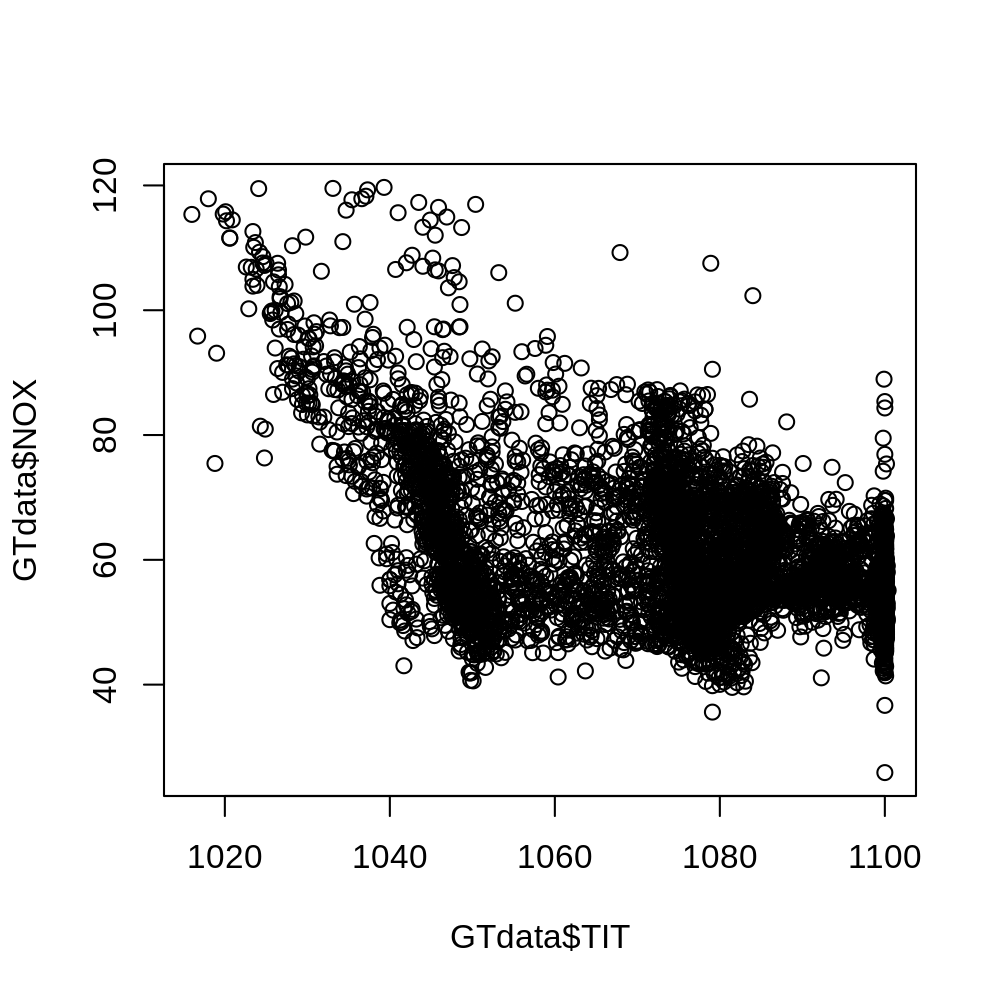

In [3]:
# Plot 'Uniformity_of_Cell_Shape'(y) vs 'Uniformity_of_Cell_Size'(x)
options(repr.plot.height=5, repr.plot.width=5, repr.plot.res = 200)
plot(GTdata$TIT, GTdata$NOX)

In [17]:
# Build a linear model to NOX (y) using TIT (x).
GT.regression <- lm(NOX ~ TIT, data=GTdata)

In [18]:
summary(GT.regression)
# Call: just reprint what you asked above. Building a linear model using 2 columns.
# Residuals: distance from the data to the fitted line. Ideally they should be symmetrically distributed around the line.
# Coefficients: the fitted line equation. y=b+ax. b=375.9964, a=-0.2930
#               t value=0 means this doesn't have much use in the model.
#                       In this case the intercept doesn't mean anything anyway.
#               p value should be below 0.05.
# Multiple R-squared: same as the usual R-squared.
# p-value again: 2.2e-16 is very small
# Small p value with bad R^2 means the relation is there, but the model is not good enough to explain the trend in the data.


Call:
lm(formula = NOX ~ TIT, data = GTdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-27.826  -5.603  -0.369   5.311  48.698 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 375.9964     6.0432   62.22   <2e-16 ***
TIT          -0.2930     0.0056  -52.32   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.509 on 7382 degrees of freedom
Multiple R-squared:  0.2705,	Adjusted R-squared:  0.2704 
F-statistic:  2737 on 1 and 7382 DF,  p-value: < 2.2e-16


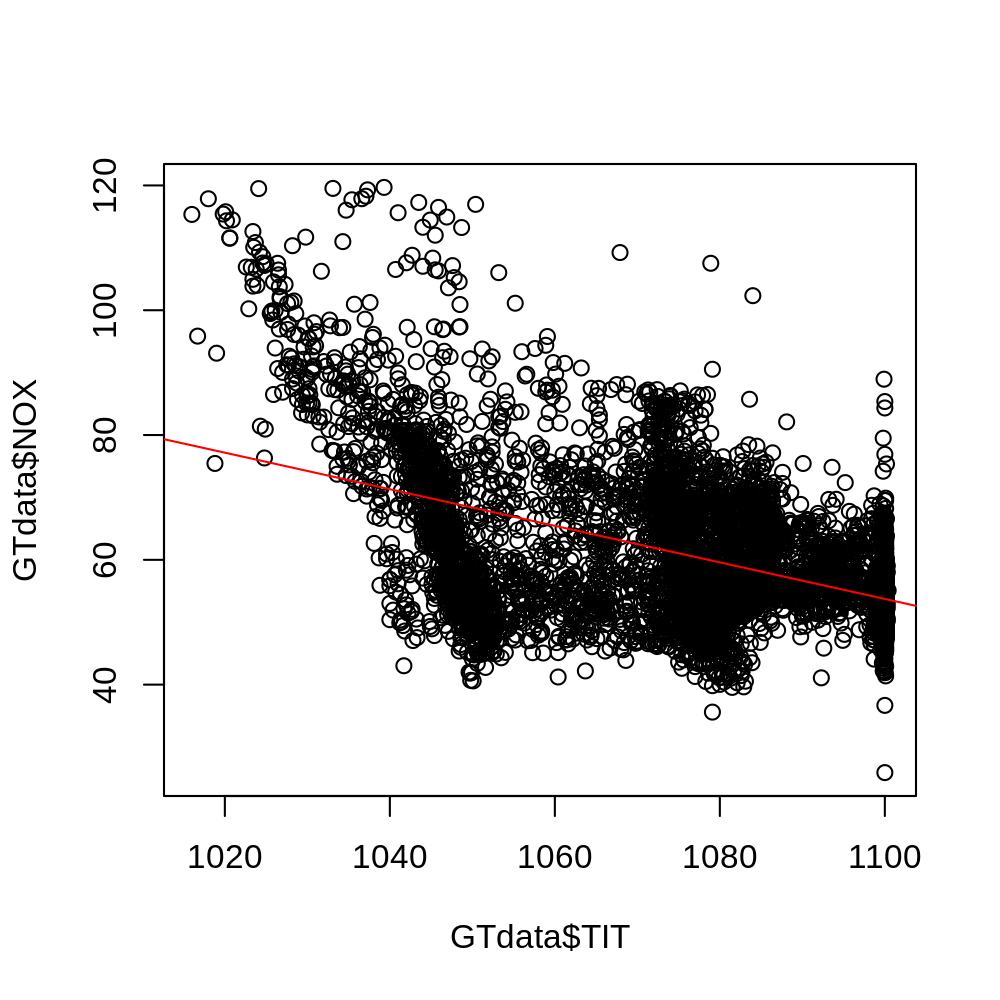

In [6]:
# Adding the fitted line to the data plot.
options(repr.plot.height=5, repr.plot.width=5, repr.plot.res = 200)
plot(GTdata$TIT, GTdata$NOX)
abline(GT.regression, col='red')

In [7]:
# Predict y using a new x.
new_data = data.frame(TIT = 1045)
predict(GT.regression, new_data)

1 
69.84403

# Multiple Regression in R
#### Unlike the above case, use multiple inputs (x features) to predict a single output (y values).

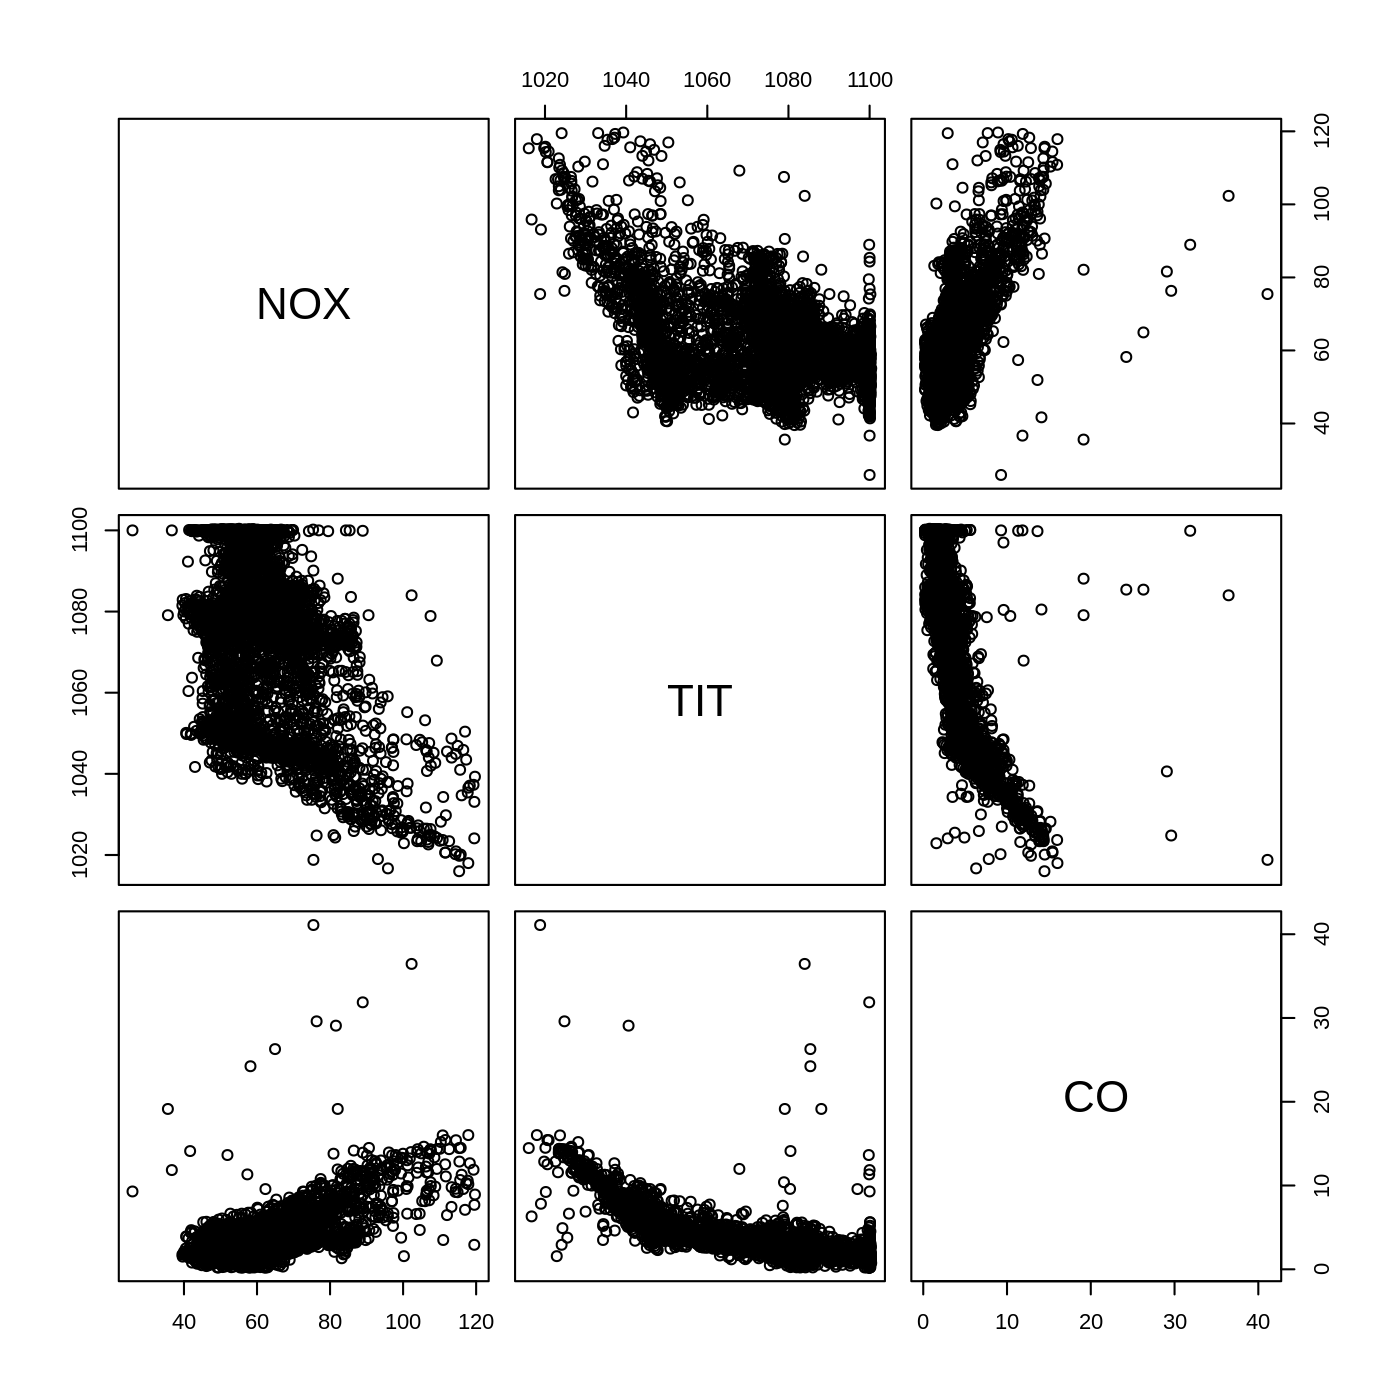

In [15]:
library(dplyr)    # dplyr offers 'select' command which selects several columns from a dataframe, and repackage it as a new one.
GTMdata <- select(GTdata, NOX, TIT, CO)
options(repr.plot.height=7, repr.plot.width=7, repr.plot.res = 200)
plot(GTMdata)     # visual check.

In [9]:
# Build a multiple regression model to predict NOX (y) using TIT (x1) and CO (x2).
GTM.regression <- lm(NOX ~ TIT + CO, data=GTMdata)
#                      y = y-intercept + slope1 * x1 + slope2 * x2

In [10]:
summary(GTM.regression)
# Same as a liner model example above.
# Multiple R-squared value looks good. p-value is still small.
# Note on the p-values of Coeffients section:
#     p-value of 'TIT' is larger than that of 'CO'. This means the prediction
#     improved when 'CO' is added as a factor. 2e-16 is the p-value with
#     'TIT' alone as a factor. 0.000787 is still less than 0.05.


Call:
lm(formula = NOX ~ TIT + CO, data = GTMdata)

Residuals:
     Min       1Q   Median       3Q      Max 
-108.246   -4.799   -0.314    4.154   58.954 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 75.657109   7.845328   9.644  < 2e-16 ***
TIT         -0.023961   0.007134  -3.359 0.000787 ***
CO           3.222732   0.063086  51.085  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.174 on 7381 degrees of freedom
Multiple R-squared:  0.461,	Adjusted R-squared:  0.4609 
F-statistic:  3157 on 2 and 7381 DF,  p-value: < 2.2e-16


In [11]:
# Predict y using new x1 and x2.
new_data = data.frame(TIT = 1045, CO=25)
predict(GTM.regression, new_data)

1 
131.1858